In [12]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
np.random.seed(19857)
pd.set_option('precision', 2)

In [13]:
geo_model = gp.create_model('NJ_3D_Mod')


In [14]:
geo_model = gp.init_data(geo_model, [0, 69000, 0, 134000, -1700, 0], [100, 300, 80], 
                         path_i="Data/SurfacePoints_update.csv")

Active grids: ['regular']


Active grids: ['regular' 'sections']


,start,stop,resolution,dist
section_a,"[15000, 0]","[15000, 134000]","[100, 20]",27859.12
section_b,"[30000, 0]","[30000, 134000]","[200, 20]",27859.12
section_c,"[45000, 0]","[45000, 134000]","[200, 20]",27859.12
section_d,"[60000, 0]","[60000, 134000]","[200, 20]",27859.12
section_dist,"[0, 100000]","[69000, 100000]","[200, 20]",21587.79
section_mid,"[0, 70000]","[69000, 70000]","[200, 20]",21587.79
section_prox,"[0, 40000]","[69000, 40000]","[200, 20]",21587.79


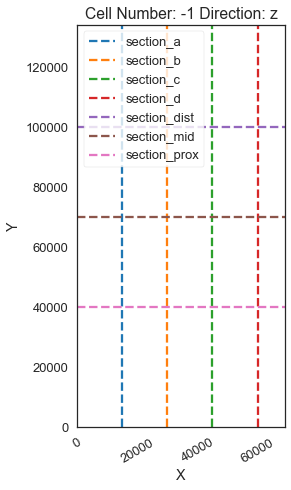

In [15]:
#Define cross sections -Not Working
x_max=69000
y_max=134000
section_dict ={'section_a':([15000,0],[15000,y_max], [100,20]),
               'section_b':([30000,0],[30000,y_max], [200,20]),
               'section_c':([45000,0],[45000,y_max], [200,20]),
               'section_d':([60000,0],[60000,y_max], [200,20]),
               'section_dist':([0,100000],[x_max,100000], [200,20]),
               'section_mid':([0,70000],[x_max,70000], [200,20]),
               'section_prox':([0,40000],[x_max,40000], [200,20])}
geo_model.set_section_grid(section_dict)
gp.plot.plot_section_traces(geo_model)
geo_model.grid.sections


In [16]:
surfaces=gp.map_stack_to_surfaces(geo_model,{"SF_series": ('SeaFloor'),
                                             "m1_series": ('m1'),
                                             "m4_1_series": ('m4_1'),
                                             "m5_series": ('m5'),
                                             "m5_4_series": ('m5_4'),
                                             "m5_8_series": ('m5_8'),
                                             "m6_series": ('m6'),
                                             "o1_series": ('o1'),
                                             "base_series": ('basement')})

#surfaces=gp.map_stack_to_surfaces(geo_model,{"Strat_series": ('SeaFloor','m1','m4_1','m5_4','m6','o1','basement')},
                           #       remove_unused_series=True)
surfaces

,surface,series,order_surfaces,color,id
0,SeaFloor,SF_series,1,#015482,1
1,m1,m1_series,1,#9f0052,2
2,m4_1,m4_1_series,1,#ffbe00,3
3,m5,m5_series,1,#728f02,4
4,m5_4,m5_4_series,1,#443988,5
5,m5_8,m5_8_series,1,#ff3f20,6
6,m6,m6_series,1,#5DA629,7
7,o1,o1_series,1,#4878d0,8
8,basement,base_series,1,#ee854a,9


In [17]:
geo_model.grid

Grid Object. Values: 
array([[  345.        ,   223.33333333, -1689.375     ],
       [  345.        ,   223.33333333, -1668.125     ],
       [  345.        ,   223.33333333, -1646.875     ],
       ...,
       [21587.79062341, 40000.        ,  -178.94736842],
       [21587.79062341, 40000.        ,   -89.47368421],
       [21587.79062341, 40000.        ,     0.        ]])

In [18]:
sf_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'SeaFloor']
gp.set_orientation_from_surface_points(geo_model,sf_dip).df.tail()

m1_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'm1']
gp.set_orientation_from_surface_points(geo_model,m1_dip).df.tail()

m4_1_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'm4_1']
gp.set_orientation_from_surface_points(geo_model,m4_1_dip).df.tail()

m5_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'm5']
gp.set_orientation_from_surface_points(geo_model,m5_dip).df.tail()

m5_4_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'm5_4']
gp.set_orientation_from_surface_points(geo_model,m5_4_dip).df.tail()

m5_8_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'm5_8']
gp.set_orientation_from_surface_points(geo_model,m5_8_dip).df.tail()

m6_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'm6']
gp.set_orientation_from_surface_points(geo_model,m6_dip).df.tail()

o1_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'o1']
gp.set_orientation_from_surface_points(geo_model,o1_dip).df.tail()

#base_dip =  geo_model.surface_points.df.index[geo_model.surface_points.df['surface'] == 'basement']
#gp.set_orientation_from_surface_points(geo_model,base_dip).df.tail()

ValueError: The values of normal are not valid.

C:\Users\Ariel\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


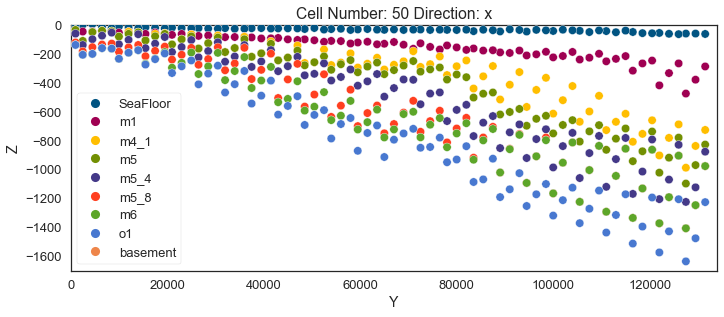

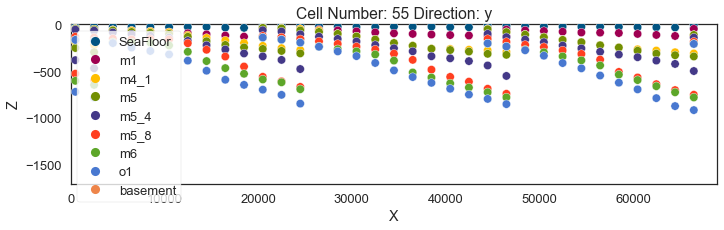

In [19]:
plot = gp.plot_2d(geo_model,cell_number=50,direction='x',show_data=True, 
                  show_lith=False,ve=30)
plot = gp.plot_2d(geo_model,cell_number=55,direction='y',show_data=True, 
                  show_lith=False,ve=10)

plt.show()


In [10]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
SF_series,1,Erosion,True,False,False
m1_series,2,Erosion,True,False,False
m4_1_series,3,Erosion,True,False,False
m5_series,4,Erosion,True,False,False
m5_4_series,5,Erosion,True,False,False
m5_8_series,6,Erosion,True,False,False
m6_series,7,Erosion,True,False,False
o1_series,8,Erosion,True,False,False
base_series,9,Erosion,False,False,False


In [11]:
interp_data = gp.set_interpolator(geo_model, theano_optimizer='fast_run',compile_theano=True)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                       values
range                                1.5e+05
$C_o$                                5.4e+08
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3]


In [13]:
mod_sol=gp.compute_model(geo_model,compute_mesh=True)

NotImplementedError: We didn't implemented yet the case where scan do 0 iteration
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(int32, vector)>, <TensorType(bool, vector)>, <TensorType(int32, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 157
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(bool, 3D), TensorType(float64, 4D), TensorType(int64, vector), TensorType(int32, vector), TensorType(int32, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(int32, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1, 1, 1, 2426000), (1, 0), (1, 1, 2426000), (1, 0, 0), (1, 1, 2426000), (1, 1, 2426000), (1, 1, 1, 2426000), (1,), (8,), (0, 0), (), (), (), (), (), (0,), (576,), (), (), (), (0,), (0,), (0,), (2426000, 3), (576, 3), (0, 3), (0,), (0,), (0,), (1, 1)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (19408000, 19408000, 19408000, 8), (8, 8), (19408000, 19408000, 8), (8, 8, 8), (2426000, 2426000, 1), (2426000, 2426000, 1), (19408000, 19408000, 19408000, 8), (8,), (4,), (4, 4), (), (), (), (), (), (8,), (8,), (), (), (), (4,), (1,), (4,), (24, 8), (8, 4608), (24, 8), (8,), (8,), (8,), (8, 8)]
Inputs values: [array(0, dtype=int64), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=bool), array([], dtype=bool), array([], dtype=bool), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), 'not shown', array([], shape=(1, 0), dtype=float64), 'not shown', array([], shape=(1, 0, 0), dtype=float64), 'not shown', 'not shown', 'not shown', array([0], dtype=int64), 'not shown', array([], shape=(0, 0), dtype=int32), array(10.), array(2.), array(0.57751412), array(2072.60445174), array(4.), array([], dtype=float64), 'not shown', array(2.), array(50.), array(50000.), array([], dtype=int32), array([], dtype=bool), array([], dtype=int32), 'not shown', 'not shown', array([], shape=(0, 3), dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([[9.]])]
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 12, 12, 12, 12, 0, 0, 12, 9, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 7, 0, 7, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.5, Constant{1})], [], []]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\Ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3155, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\Ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3347, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-0e80ba4c2fce>", line 1, in <module>
    interp_data = gp.set_interpolator(geo_model, theano_optimizer='fast_run',compile_theano=True)
  File "C:\Users\Ariel\anaconda3\lib\site-packages\gempy\api_modules\setters.py", line 108, in set_interpolator
    geo_model._interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "C:\Users\Ariel\anaconda3\lib\site-packages\gempy\core\interpolator.py", line 1027, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "C:\Users\Ariel\anaconda3\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 558, in theano_output
    solutions[:9] = self.compute_series()
  File "C:\Users\Ariel\anaconda3\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 403, in compute_series
    series, self.updates1 = theano.scan(

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | | |   |   |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |   |   |<TensorType(int32, vector)> [id CL] <TensorType(int32, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id DG] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DH] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DL] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DM] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id DP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DQ] <int64>
 | | |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DS] <int64>
 | |Rebroadcast{0} [id DK] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id DT] <int64> ''   
 |   |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DU] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id DV] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id DW] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EA] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id EB] <TensorType(float64, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EC] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DO] <int64>
 | |Rebroadcast{0} [id DZ] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EF] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EK] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EL] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EI] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id EN] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id EO] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EP] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EQ] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id ER] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EV] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id EW] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id EX] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id EY] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id EZ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FA] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FB] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FC] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FD] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ET] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EU] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FF] <int64> ''   
 |   |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FG] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FH] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FM] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FN] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FQ] <int64> ''   
 |   |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FR] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FS] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FT] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FV] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FW] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FX] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id FY] <TensorType(bool, matrix)> ''   
 | | |   |       |mask matrix [id FN] <TensorType(bool, matrix)>
 | | |   |       |TensorConstant{(1, 1) of False} [id FZ] <TensorType(bool, (True, True))>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id GA] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FV] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id GB] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FV] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id FW] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id GC] <int64> ''   
 |   |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GD] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id GE] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id GF] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GG] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GH] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GI] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id GJ] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GK] <TensorType(float64, 3D)> ''   
 | | |   |       |block matrix [id DM] <TensorType(float64, 3D)>
 | | |   |       |TensorConstant{(1, 1, 1) of 0.0} [id GL] <TensorType(float64, (True, True, True))>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id GM] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GH] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id GN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GH] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DQ] <int64>
 | | |Subtensor{int64} [id GO] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GH] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DS] <int64>
 | |Rebroadcast{0} [id GI] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id GP] <int64> ''   
 |   |Subtensor{int64} [id GG] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GQ] <TensorType(int64, vector)> ''   
 | |AllocEmpty{dtype='int64'} [id GR] <TensorType(int64, vector)> ''   
 | | |Elemwise{add,no_inplace} [id GS] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{1} [id GT] <TensorType(int64, scalar)>
 | |TensorConstant{(1,) of 0} [id GU] <TensorType(int64, vector)>
 | |Constant{1} [id DO] <int64>
 |Number of points per surface used to split rest-ref [id GV] <TensorType(int32, vector)>
 |fault relation matrix [id GW] <TensorType(int32, matrix)>
 |<TensorType(float64, scalar)> [id GX] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id GY] <TensorType(float64, scalar)>
 |Range [id GZ] <TensorType(float64, scalar)>
 |Covariance at 0 [id HA] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HB] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id HC] <TensorType(float64, vector)>
 |Nugget effect of scalar [id HD] <TensorType(float64, vector)>
 |Attenuation factor [id HE] <TensorType(float64, scalar)>
 |Sigmoid Outside [id HF] <TensorType(float64, scalar)>
 |Sigmoid slope [id HG] <TensorType(float64, scalar)>
 |<TensorType(int32, vector)> [id CL] <TensorType(int32, vector)>
 |<TensorType(bool, vector)> [id HH] <TensorType(bool, vector)>
 |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 |Coordinates of the grid points to interpolate [id HI] <TensorType(float64, matrix)>
 |All the surface_points points at once [id HJ] <TensorType(float64, matrix)>
 |Position of the dips [id HK] <TensorType(float64, matrix)>
 |Angle of every dip [id HL] <TensorType(float64, vector)>
 |Azimuth [id HM] <TensorType(float64, vector)>
 |Polarity [id HN] <TensorType(float64, vector)>
 |Values that the blocks are taking [id HO] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
for{cpu,Looping}.7 [id A] <TensorType(int64, vector)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id HQ] <TensorType(float64, 3D)> -> [id DF]
 > |if{} [id HR] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id HS] <TensorType(bool, scalar)> -> [id CZ]
 > | |if{} [id HT] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id HU] <TensorType(int32, scalar)> -> [id DA]
 > | | |Sum{axis=[0], acc_dtype=float64} [id HV] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id HW] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id HX] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id HQ] <TensorType(float64, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id HY] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id HZ] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id HY] <int32> ''   
 > |Constant{0} [id IA] <int8>
 > |ScalarFromTensor [id IB] <int64> ''   
 >   |Elemwise{add,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 >     |Elemwise{add,no_inplace} [id ID] <TensorType(int64, scalar)> ''   
 >     | |Subtensor{int64} [id IE] <TensorType(int64, scalar)> ''   
 >     | | |Shape [id IF] <TensorType(int64, vector)> ''   
 >     | | | |Coordinates of the grid points to interpolate_copy [id IG] <TensorType(float64, matrix)> -> [id HI]
 >     | | |Constant{0} [id IH] <int64>
 >     | |Elemwise{mul,no_inplace} [id II] <TensorType(int64, scalar)> ''   
 >     |   |TensorConstant{2} [id IJ] <TensorType(int8, scalar)>
 >     |   |Elemwise{sub,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 >     |     |Subtensor{int64} [id IL] <TensorType(int64, scalar)> ''   
 >     |     | |Shape [id IM] <TensorType(int64, vector)> ''   
 >     |     | | |All the surface_points points at once_copy [id IN] <TensorType(float64, matrix)> -> [id HJ]
 >     |     | |Constant{0} [id IH] <int64>
 >     |     |Subtensor{int64} [id IO] <TensorType(int64, scalar)> ''   
 >     |       |Shape [id IP] <TensorType(int64, vector)> ''   
 >     |       | |Number of points per surface used to split rest-ref_copy [id IQ] <TensorType(int32, vector)> -> [id GV]
 >     |       |Constant{0} [id IH] <int64>
 >     |TensorConstant{0} [id IR] <TensorType(int8, scalar)>
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id IT] <TensorType(float64, vector)> -> [id DU]
 > |if{} [id IU] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id IV] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id IW] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id IX] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id IT] <TensorType(float64, vector)> -> [id DU]
 > |   |ScalarFromTensor [id IY] <int32> ''   
 > |   | |Length of weights in every series[t] [id IZ] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id JA] <int32> ''   
 > |     |Length of weights in every series[t+1] [id JB] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id IY] <int32> ''   
 > |ScalarFromTensor [id JA] <int32> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id JD] <TensorType(float64, matrix)> -> [id EE]
 > |if{} [id JE] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id JF] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id JG] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id JH] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id JD] <TensorType(float64, matrix)> -> [id EE]
 > |   |ScalarFromTensor [id HY] <int32> ''   
 > |ScalarFromTensor [id HY] <int32> ''   
 > |Constant{0} [id IA] <int8>
 > |ScalarFromTensor [id IB] <int64> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id JJ] <TensorType(float64, matrix)> -> [id EP]
 > |AdvancedSubtensor1 [id JK] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id JL] <TensorType(float64, vector)> ''   
 > | | |if{} [id JE] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id JM] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id JN] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id JO] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 > | | |ScalarFromTensor [id JP] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id JQ] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id JR] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id JS] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id JT] <int32> ''   
 > |   | |List with the number of surfaces[t] [id JU] <TensorType(int32, scalar)> -> [id CU]
 > |   |ScalarFromTensor [id JV] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id JW] <TensorType(int32, scalar)> -> [id CV]
 > |<TensorType(int32, scalar)> [id HZ] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id JX] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id JY] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id JZ] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id JT] <int32> ''   
 >   | |ScalarFromTensor [id JV] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id KA] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int64:int32:, int8:int64:} [id KC] <TensorType(bool, matrix)> ''   
 > | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 > | | |mask matrix[t-1] [id KE] <TensorType(bool, matrix)> -> [id FG]
 > | | |if{} [id KF] <TensorType(bool, vector)> ''   
 > | | | |<TensorType(int32, scalar)> [id KG] <TensorType(int32, scalar)> -> [id DC]
 > | | | |Elemwise{gt,no_inplace} [id KH] <TensorType(bool, vector)> ''   
 > | | | | |if{} [id JE] <TensorType(float64, vector)> ''   
 > | | | | |InplaceDimShuffle{x} [id KI] <TensorType(float64, (True,))> ''   
 > | | | |   |MaxAndArgmax{axis=(0,)}.0 [id KJ] <TensorType(float64, scalar)> 'max'   
 > | | | |Subtensor{int32, int8:int64:} [id KK] <TensorType(bool, vector)> ''   
 > | | |   |mask matrix[t-1] [id KE] <TensorType(bool, matrix)> -> [id FG]
 > | | |   |ScalarFromTensor [id KL] <int32> ''   
 > | | |   | |Elemwise{sub,no_inplace} [id KM] <TensorType(int32, scalar)> ''   
 > | | |   |   |<TensorType(int32, scalar)> [id HZ] <TensorType(int32, scalar)> -> [id DD]
 > | | |   |   |TensorConstant{1} [id KN] <TensorType(int8, scalar)>
 > | | |   |Constant{0} [id IA] <int8>
 > | | |   |ScalarFromTensor [id IB] <int64> ''   
 > | | |ScalarFromTensor [id KL] <int32> ''   
 > | | |ScalarFromTensor [id HY] <int32> ''   
 > | | |Constant{0} [id IA] <int8>
 > | | |ScalarFromTensor [id IB] <int64> ''   
 > | |Subtensor{::int64} [id KO] <TensorType(bool, matrix)> ''   
 > | | |CumOp{0, mul} [id KP] <TensorType(bool, matrix)> ''   
 > | | | |Subtensor{::int64} [id KQ] <TensorType(bool, matrix)> ''   
 > | | |   |Subtensor{int64:int32:, int8:int64:} [id KR] <TensorType(bool, matrix)> ''   
 > | | |   | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 > | | |   | |ScalarFromTensor [id KS] <int64> ''   
 > | | |   | | |Elemwise{sub,no_inplace} [id KT] <TensorType(int64, scalar)> ''   
 > | | |   | |   |<TensorType(int32, scalar)> [id HZ] <TensorType(int32, scalar)> -> [id DD]
 > | | |   | |   |Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   
 > | | |   | |     |Elemwise{mul,no_inplace} [id KV] <TensorType(int64, scalar)> ''   
 > | | |   | |     | |Elemwise{add,no_inplace} [id KW] <TensorType(int64, scalar)> ''   
 > | | |   | |     | | |<TensorType(int64, scalar)> [id KX] <TensorType(int64, scalar)> -> [id GQ]
 > | | |   | |     | | |Elemwise{add,no_inplace} [id KY] <TensorType(int32, scalar)> ''   
 > | | |   | |     | |   |Subtensor{int32} [id KZ] <TensorType(int32, scalar)> ''   
 > | | |   | |     | |   | |<TensorType(int32, vector)> [id LA] <TensorType(int32, vector)> -> [id CL]
 > | | |   | |     | |   | |ScalarFromTensor [id HY] <int32> ''   
 > | | |   | |     | |   |Subtensor{int32} [id LB] <TensorType(bool, scalar)> ''   
 > | | |   | |     | |     |<TensorType(bool, vector)> [id LC] <TensorType(bool, vector)> -> [id HH]
 > | | |   | |     | |     |ScalarFromTensor [id HY] <int32> ''   
 > | | |   | |     | |Elemwise{add,no_inplace} [id KY] <TensorType(int32, scalar)> ''   
 > | | |   | |     |Subtensor{int64} [id LD] <TensorType(int32, scalar)> ''   
 > | | |   | |       |<TensorType(int32, vector)> [id LA] <TensorType(int32, vector)> -> [id CL]
 > | | |   | |       |ScalarFromTensor [id LE] <int64> ''   
 > | | |   | |         |Elemwise{sub,no_inplace} [id LF] <TensorType(int64, scalar)> ''   
 > | | |   | |           |<TensorType(int32, scalar)> [id HZ] <TensorType(int32, scalar)> -> [id DD]
 > | | |   | |           |<TensorType(int64, scalar)> [id KX] <TensorType(int64, scalar)> -> [id GQ]
 > | | |   | |ScalarFromTensor [id HY] <int32> ''   
 > | | |   | |Constant{0} [id IA] <int8>
 > | | |   | |ScalarFromTensor [id IB] <int64> ''   
 > | | |   |Constant{-1} [id LG] <int64>
 > | | |Constant{-1} [id LG] <int64>
 > | |ScalarFromTensor [id KS] <int64> ''   
 > | |ScalarFromTensor [id HY] <int32> ''   
 > | |Constant{0} [id IA] <int8>
 > | |ScalarFromTensor [id IB] <int64> ''   
 > |if{} [id LH] <TensorType(bool, vector)> ''   
 > | |<TensorType(int32, scalar)> [id LI] <TensorType(int32, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id LJ] <TensorType(bool, vector)> ''   
 > | | |if{} [id JE] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id LK] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id LL] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id LM] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id LN] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id LO] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id LP] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id LB] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{second,no_inplace} [id LQ] <TensorType(bool, vector)> ''   
 > |     |if{} [id JE] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id LR] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id HY] <int32> ''   
 > |Constant{0} [id IA] <int8>
 > |ScalarFromTensor [id IB] <int64> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 > |<TensorType(bool, matrix)> [id LT] <TensorType(bool, matrix)> -> [id FR]
 > |Elemwise{add,no_inplace} [id LU] <TensorType(bool, vector)> ''   
 > | |if{} [id LH] <TensorType(bool, vector)> ''   
 > | |if{} [id LV] <TensorType(bool, vector)> ''   
 > |   |Subtensor{int32} [id LB] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{gt,no_inplace} [id LJ] <TensorType(bool, vector)> ''   
 > |   |Elemwise{second,no_inplace} [id LW] <TensorType(bool, vector)> ''   
 > |     |if{} [id JE] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of False} [id LX] <TensorType(bool, (True,))>
 > |Elemwise{mul,no_inplace} [id LY] <TensorType(bool, vector)> ''   
 > | |Subtensor{:int64:} [id LZ] <TensorType(bool, vector)> ''   
 > | | |<TensorType(bool, vector)> [id LC] <TensorType(bool, vector)> -> [id HH]
 > | | |ScalarFromTensor [id MA] <int64> ''   
 > | |   |Subtensor{int64} [id MB] <TensorType(int64, scalar)> ''   
 > | |     |Shape [id MC] <TensorType(int64, vector)> ''   
 > | |     | |<TensorType(int32, vector)> [id MD] <TensorType(int32, vector)> -> [id CH]
 > | |     |Constant{0} [id IH] <int64>
 > | |Elemwise{invert,no_inplace} [id ME] <TensorType(bool, vector)> ''   
 > |   |Elemwise{Cast{bool}} [id MF] <TensorType(bool, vector)> ''   
 > |     |Subtensor{:int64:} [id MG] <TensorType(int32, vector)> ''   
 > |       |Subtensor{::, int8} [id MH] <TensorType(int32, vector)> ''   
 > |       | |fault relation matrix_copy [id MI] <TensorType(int32, matrix)> -> [id GW]
 > |       | |ScalarFromTensor [id MJ] <int8> ''   
 > |       |   |Elemwise{Cast{int8}} [id MK] <TensorType(int8, scalar)> ''   
 > |       |     |<TensorType(int32, scalar)> [id HZ] <TensorType(int32, scalar)> -> [id DD]
 > |       |ScalarFromTensor [id MA] <int64> ''   
 > |MakeSlice [id ML] <slice> ''   
 >   |TensorConstant{0} [id IR] <TensorType(int8, scalar)>
 >   |Elemwise{add,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 >   |NoneConst [id MM] <NoneTypeT>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 > |<TensorType(float64, 3D)> [id MO] <TensorType(float64, 3D)> -> [id GD]
 > |if{} [id HR] <TensorType(float64, matrix)> ''   
 > |ScalarFromTensor [id HY] <int32> ''   
 > |Constant{0} [id IA] <int8>
 > |ScalarFromTensor [id IB] <int64> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.7 [id A] <TensorType(int64, vector)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HP] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IS] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JC] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JI] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KB] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LS] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MN] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id KU] <TensorType(int64, scalar)> ''   

Storage map footprint:
 - Coordinates of the grid points to interpolate, Input, Shape: (2426000, 3), ElemSize: 8 Byte(s), TotalSize: 58224000 Byte(s)
 - block matrix, Shared Input, Shape: (1, 1, 2426000), ElemSize: 8 Byte(s), TotalSize: 19408000 Byte(s)
 - Scalar matrix, Shared Input, Shape: (1, 2426000), ElemSize: 8 Byte(s), TotalSize: 19408000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 1, 1, 2426000), ElemSize: 8 Byte(s), TotalSize: 19408000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 1, 2426000), ElemSize: 8 Byte(s), TotalSize: 19408000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 1, 1, 2426000), ElemSize: 8 Byte(s), TotalSize: 19408000 Byte(s)
 - mask matrix, Shared Input, Shape: (1, 2426000), ElemSize: 1 Byte(s), TotalSize: 2426000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 1, 2426000), ElemSize: 1 Byte(s), TotalSize: 2426000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 1, 2426000), ElemSize: 1 Byte(s), TotalSize: 2426000 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - All the surface_points points at once, Input, Shape: (576, 3), ElemSize: 8 Byte(s), TotalSize: 13824 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (576,), ElemSize: 8 Byte(s), TotalSize: 4608 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (9,), ElemSize: 4 Byte(s), TotalSize: 36 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (8,), ElemSize: 4 Byte(s), TotalSize: 32 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Attenuation factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid Outside, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid slope, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1, 1, 1) of 0.0}, Shape: (1, 1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of False}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Position of the dips, Input, Shape: (0, 3), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Angle of every dip, Input, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Azimuth, Input, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Polarity, Input, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 2426000), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Weights vector, Shared Input, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - fault relation matrix, Shared Input, Shape: (0, 0), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (0,), ElemSize: 1 Byte(s), TotalSize: 0 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 0, 0), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 0), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 1 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 1 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 1 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 162583710.0 Byte(s) 0.151 GB
 TotalSize inputs: 99507694.0 Byte(s) 0.093 GB



C:\Users\Ariel\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


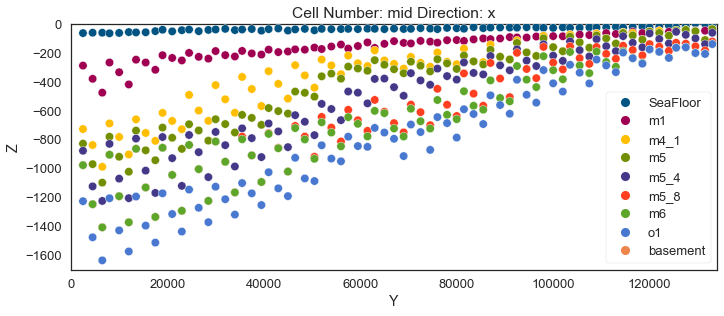

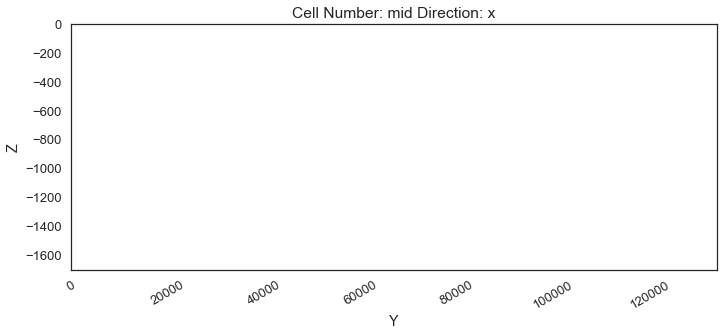

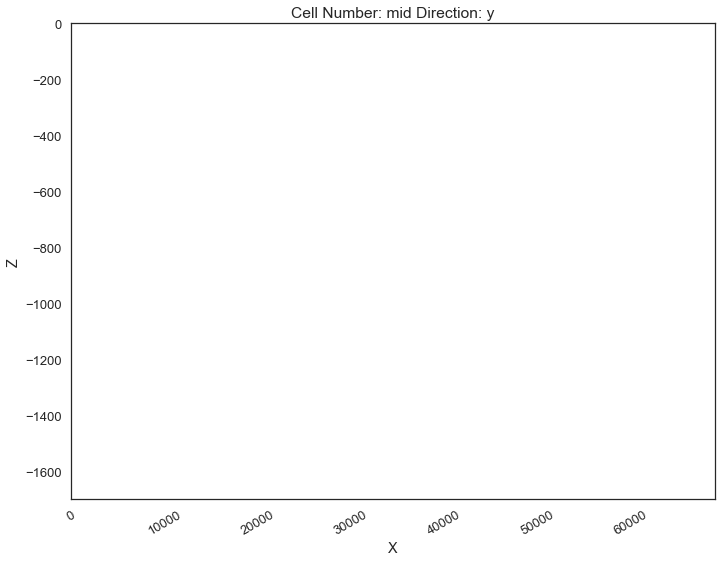

In [11]:
plot = gp.plot_2d(geo_model,direction='x',show_data=True, show_lith=False, show_boundaries=True,ve=30)
plot = gp.plot_2d(geo_model,direction='x',show_data=False, show_lith=True, show_boundaries=True,ve=30)
plot = gp.plot_2d(geo_model,direction='y',show_data=False, show_lith=True, show_boundaries=False,ve=30)

plt.show()

#plot.fig.show()

In [12]:
gpv=gp.plot_3d(geo_model, 
             image=False,
             show_data=False,
             ve=40, 
             show_lith=True, show_surfaces=True,plotter_type='basic')

In [41]:
gp.save_model(geo_model)

True